In [66]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.io import fits

mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix',
                            'image.cmap': 'viridis'})

path = '/astro/store/gradscratch/tmp/scw7/tessData/lightcurves/sec7/'

In [2]:
# Now look at flare stats from iterative gaussian process fitting
df = pd.read_csv('7.gauss_flare_out.csv')
nf = len(df)
nt = len(np.unique(df['TIC']))
print(str(nf) + ' flare detections from ' + str(nt) + ' targets')

3747 flare detections from 869 targets


In [3]:
df

,Unnamed: 0,Unnamed: 0.1,TIC,t0,t1,med,peak,ed,ed_err,mu,...,std_err,g_amp_err,tpeak,fwhm,f_amp,tpeak_err,fwhm_err,f_amp_err,f_chisq,g_chisq
0,0,2.0,278731274,1498.670431,1498.717654,2.708514e+03,4.685688e+03,0.006721,0.000195,1498.675451,...,0.000245,0.000241,1498.672011,0.005568,0.750897,0.000048,0.000167,0.015865,22.487593,105.675029
1,1,2.0,278731274,1499.495432,1499.502376,2.708514e+03,2.852314e+03,0.000357,0.000074,1499.496622,...,0.000252,0.000033,1499.495690,0.002416,0.090699,0.000050,0.000208,0.005406,0.851335,6.007245
2,2,2.0,278731274,1510.944026,1510.955137,2.708514e+03,2.702173e+03,0.000511,0.000622,1510.950877,...,0.000736,0.000031,1510.948342,0.017758,0.022002,0.000719,0.003025,0.002189,1.497893,1.202344
3,3,2.0,278731274,1513.306517,1513.312072,2.708514e+03,2.761938e+03,0.000211,0.000059,1513.308180,...,0.000396,0.000038,1513.306836,0.001939,0.079772,0.000100,0.000674,0.019208,3.044672,7.889871
4,4,6.0,122902148,1491.903587,1491.913309,1.444623e+03,1.558941e+03,0.001039,0.000504,1491.908733,...,0.000593,0.000088,1491.905834,0.007855,0.090029,0.000286,0.001128,0.008047,2.137958,5.313361
5,5,6.0,122902148,1491.917476,1491.923032,1.444623e+03,1.491459e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
6,6,6.0,122902148,1496.471734,1496.485623,1.444623e+03,1.537511e+03,0.001118,0.001329,1496.478108,...,0.000732,0.000060,1496.475936,0.020129,0.040780,0.000822,0.003412,0.004105,1.691168,1.105542
7,7,6.0,122902148,1505.046777,1505.088444,1.444623e+03,1.580094e+03,0.002694,0.000910,1505.058817,...,0.000772,0.000110,1505.051234,0.013711,0.112820,0.000222,0.000755,0.004177,1.189989,2.370187
8,8,6.0,122902148,1505.417612,1505.425945,1.444623e+03,1.555732e+03,0.000526,0.000187,1505.419694,...,0.000316,0.000050,1505.418106,0.003045,0.115451,0.000083,0.000363,0.009402,0.960840,3.085461
9,9,6.0,122902148,1514.843925,1514.856425,1.444623e+03,1.674135e+03,0.000954,0.000401,1514.844924,...,0.000124,0.000048,1514.844597,0.006250,0.126462,0.000245,0.001068,0.014206,5.472964,5.248436


In [58]:
df_param = pd.read_csv('7.gauss_param_out.csv')
bad_TICs = df_param[df_param['p_res'] > 100]['TIC'].values
print(str(len(bad_TICs)) + ' LCs need to be re-run')
a = np.in1d(df['TIC'], bad_TICs)

4900 LCs need to be re-run


In [63]:
path1 = '/gscratch/stf/scw7/tessFlares/sec7/'
files = []
for TIC in bad_TICs:
    TIC_str = str(int(TIC)).zfill(16)
    files.append(path1+'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits')
np.savetxt('files_to_rerun.txt', files, delimiter='\n', fmt='%s')

In [52]:
df_sub = df[a]
mask = (df_sub['f_chisq'] < df_sub['g_chisq']) & (df_sub['f_chisq'] > 0)
df_cut = df_sub[mask]
nf = len(df_cut[mask])
nt = len(np.unique(df_cut[mask]['TIC']))
print(str(nf) + ' flare detections from ' + str(nt) + ' targets')

505 flare detections from 250 targets


/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [64]:
df_sub

,Unnamed: 0,Unnamed: 0.1,TIC,t0,t1,med,peak,ed,ed_err,mu,...,std_err,g_amp_err,tpeak,fwhm,f_amp,tpeak_err,fwhm_err,f_amp_err,f_chisq,g_chisq
0,0,2.0,278731274,1498.670431,1498.717654,2.708514e+03,4.685688e+03,0.006721,0.000195,1498.675451,...,0.000245,0.000241,1498.672011,0.005568,0.750897,0.000048,0.000167,0.015865,22.487593,105.675029
1,1,2.0,278731274,1499.495432,1499.502376,2.708514e+03,2.852314e+03,0.000357,0.000074,1499.496622,...,0.000252,0.000033,1499.495690,0.002416,0.090699,0.000050,0.000208,0.005406,0.851335,6.007245
2,2,2.0,278731274,1510.944026,1510.955137,2.708514e+03,2.702173e+03,0.000511,0.000622,1510.950877,...,0.000736,0.000031,1510.948342,0.017758,0.022002,0.000719,0.003025,0.002189,1.497893,1.202344
3,3,2.0,278731274,1513.306517,1513.312072,2.708514e+03,2.761938e+03,0.000211,0.000059,1513.308180,...,0.000396,0.000038,1513.306836,0.001939,0.079772,0.000100,0.000674,0.019208,3.044672,7.889871
20,20,114.0,50285909,1504.878102,1504.910047,3.492900e+04,3.486248e+04,0.000264,0.000289,1504.835727,...,0.020038,0.000518,1504.885587,0.083533,0.005042,0.001882,0.008896,0.000209,1.055258,0.919099
21,21,114.0,50285909,1504.923936,1504.929491,3.492900e+04,3.481371e+04,0.000267,0.000390,1504.922906,...,0.008944,0.000071,1504.918755,0.106677,0.003674,0.003242,0.069375,0.000293,0.957845,0.929054
24,24,124.0,266948287,1511.739903,1511.787125,1.388401e+03,1.610668e+03,0.003706,0.001160,1511.753678,...,0.000604,0.000131,1511.746961,0.020165,0.124977,0.000371,0.001378,0.005619,4.260078,5.610715
37,37,236.0,127652970,1496.074277,1496.128445,2.642617e+02,1.674797e+03,0.074892,0.002706,1496.082363,...,0.000188,0.001904,1496.078859,0.007288,6.674039,0.000056,0.000197,0.125975,15.467968,55.510792
38,38,236.0,127652970,1507.874405,1507.879961,2.642617e+02,4.364323e+02,0.003533,0.000532,1507.875917,...,0.000240,0.000355,1507.874892,0.002193,1.083049,0.000034,0.000238,0.080286,0.622117,6.512714
39,39,236.0,127652970,1508.074406,1508.082740,2.642617e+02,3.423664e+02,0.004376,0.002753,1508.079836,...,0.000686,0.000329,1508.076478,0.007424,0.321392,0.000245,0.000976,0.026473,0.685575,1.884344


In [36]:
df_param

,Unnamed: 0,Unnamed: 0.1,TIC,med,s_window,acf_1dt,ls_per,p_res,gp_log_s00,gp_log_omega00,gp_log_s01,gp_log_omega01,gp_log_q11
0,0,0,148245163,4.624792e+02,479.0,3.992919,0.024195,16.406269,-17.844065,-8.173674,-15.974960,-4.140515,-5.439705
1,1,1,231941557,8.500229e+04,249.0,2.082588,1.960784,202.985303,-20.000000,-13.354476,-20.000000,-7.919648,-14.561576
2,2,2,382030592,3.559244e+04,992.0,8.270647,11.111111,143.472230,-20.000000,-15.000000,-20.000000,-5.111854,-7.562320
3,3,3,142017826,2.779084e+04,694.0,5.784073,4.761905,33.078417,-20.000000,-9.061688,-17.815675,1.551158,0.206468
4,4,4,281582359,7.743586e+03,403.0,3.363223,5.555556,37.728472,-20.000000,-11.761165,-20.000000,-5.001797,-7.678940
5,5,5,140161211,5.340797e+02,459.0,3.830490,0.015528,13.388527,-19.838419,-13.028157,-16.926702,-4.947423,-7.399370
6,6,6,349370704,1.024626e+04,672.0,5.601417,0.013822,13.444549,-20.000000,-9.597616,-20.000000,-4.741113,-5.670924
7,7,7,148455647,5.662209e+01,332.0,2.774206,0.025478,11.640066,-14.112121,-7.375843,-13.070033,-4.822647,-6.050802
8,8,8,219170912,1.188429e+05,797.0,6.644316,3.333333,38.766852,-18.246972,0.980220,-20.000000,-6.000303,-5.452761
9,9,9,142677613,1.316906e+05,372.0,3.100569,1.538462,156.217689,-9.432113,2.464373,-14.467180,-5.392359,-3.364397


/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log10


(1, 200)

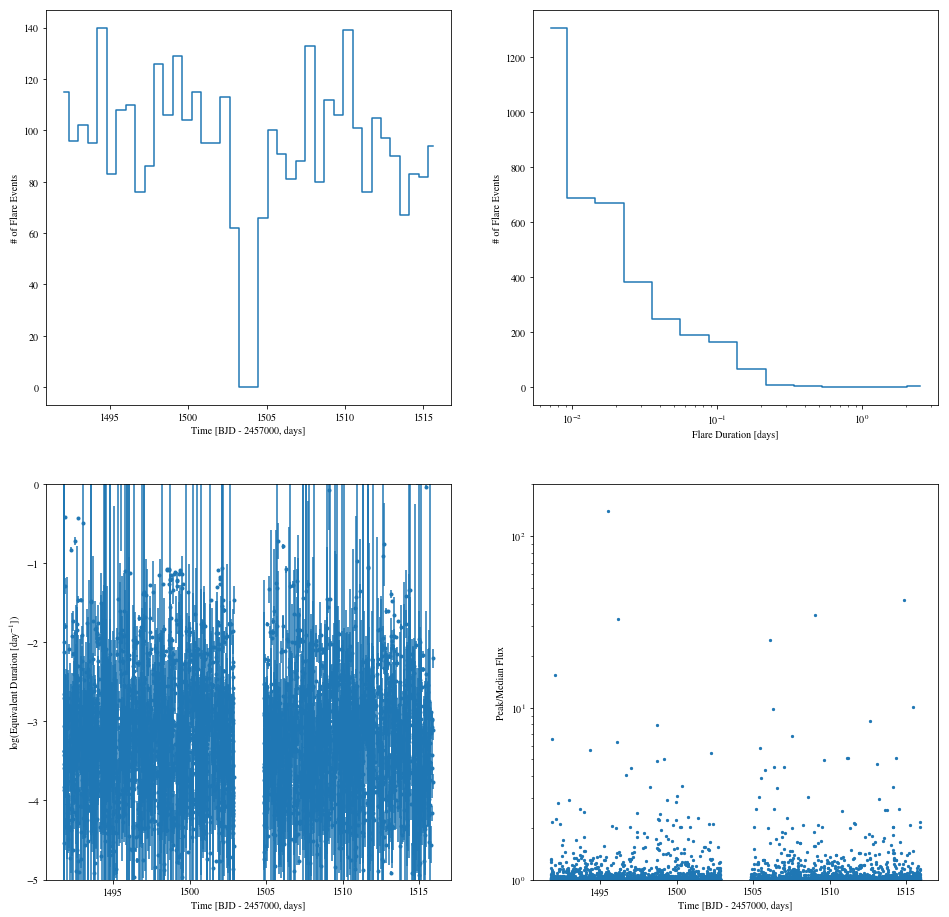

In [10]:
fig, axes = plt.subplots(figsize=(16,16), nrows=2, ncols=2)

hist, bins = np.histogram(df['t0'], bins=40)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][0].plot(bins, hist, linestyle='steps-mid')
axes[0][0].set_xlabel('Time [BJD - 2457000, days]')
axes[0][0].set_ylabel('# of Flare Events')

duration = df['t1'] - df['t0']
bins = np.logspace(np.log10(np.min(duration)), np.log10(np.max(duration)), num=15)
hist, bins = np.histogram(duration, bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][1].semilogx(bins, hist, linestyle='steps-mid')
axes[0][1].set_xlabel('Flare Duration [days]')
axes[0][1].set_ylabel('# of Flare Events')

bins = 0.5*(bins[1:] + bins[:-1])
y = np.log10(df['ed'])
yerr = 0.434*df['ed_err']/df['ed']
axes[1][0].errorbar(df['t0'], y, yerr=yerr, fmt='.')
#axes[1][0].set_yscale('log')
axes[1][0].set_ylim(-5, 0)
axes[1][0].set_xlabel('Time [BJD - 2457000, days]')
axes[1][0].set_ylabel(r'log(Equivalent Duration [day$^{-1}$])')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][1].scatter(df['t0'], df['peak']/df['med'], s=5)
axes[1][1].set_yscale('log')
axes[1][1].set_xlabel('Time [BJD - 2457000, days]')
axes[1][1].set_ylabel('Peak/Median Flux')
axes[1][1].set_ylim(1, 200)

/astro/users/scw7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


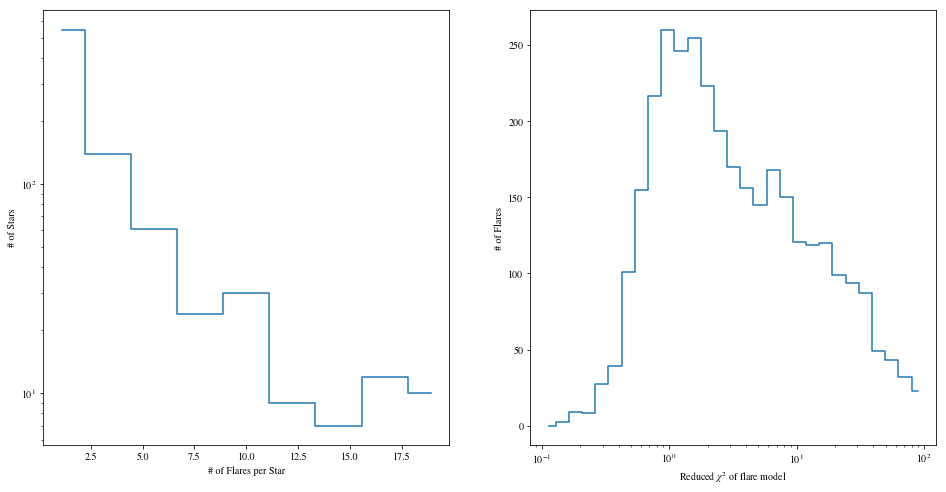

In [14]:
fig, axes = plt.subplots(figsize=(16,8), nrows=1, ncols=2)

unique_tic = df['TIC'].drop_duplicates().as_matrix()
num_flares = np.zeros(len(unique_tic))
for idx, val in enumerate(unique_tic):
    num_flares[idx] = len(df[df['TIC'] == val])

bins = np.linspace(0, 20, num=10)
hist, bins = np.histogram(num_flares, bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0].plot(bins, hist, linestyle='steps-mid')
axes[0].set_xlabel('# of Flares per Star')
axes[0].set_ylabel('# of Stars')
axes[0].set_yscale('log')

q = df['f_chisq']
bins = np.logspace(-1, 2, num=30)
hist, bins = np.histogram(q, bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
axes[1].plot(bins, hist, linestyle='steps-mid')
axes[1].set_xlabel(r'Reduced $\chi^{2}$ of flare model')
axes[1].set_ylabel('# of Flares')
axes[1].set_xscale('log')

tess2019006130736-s0007-0000000278731274-0131-s_lc.fits
tess2019006130736-s0007-0000000122723011-0131-s_lc.fits
tess2019006130736-s0007-0000000468928739-0131-s_lc.fits
tess2019006130736-s0007-0000000032090583-0131-s_lc.fits
tess2019006130736-s0007-0000000167551757-0131-s_lc.fits


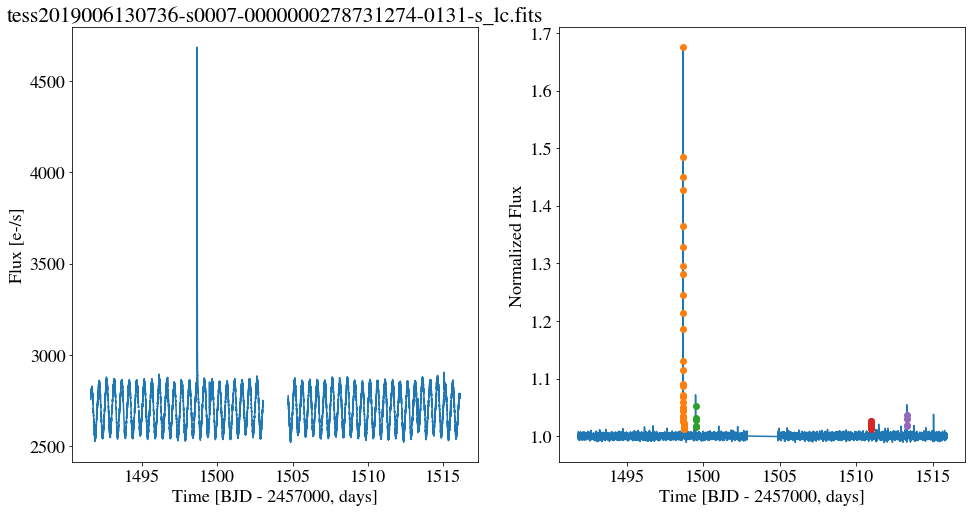

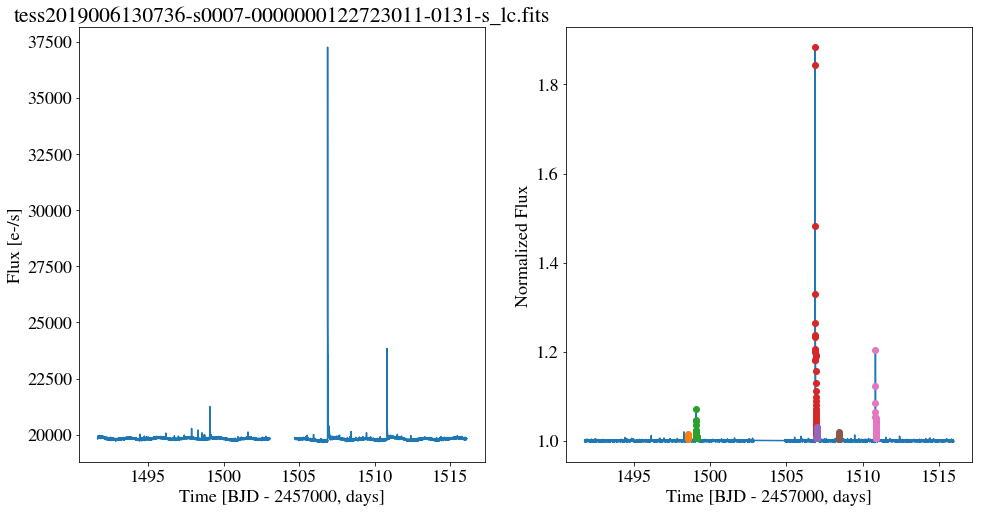

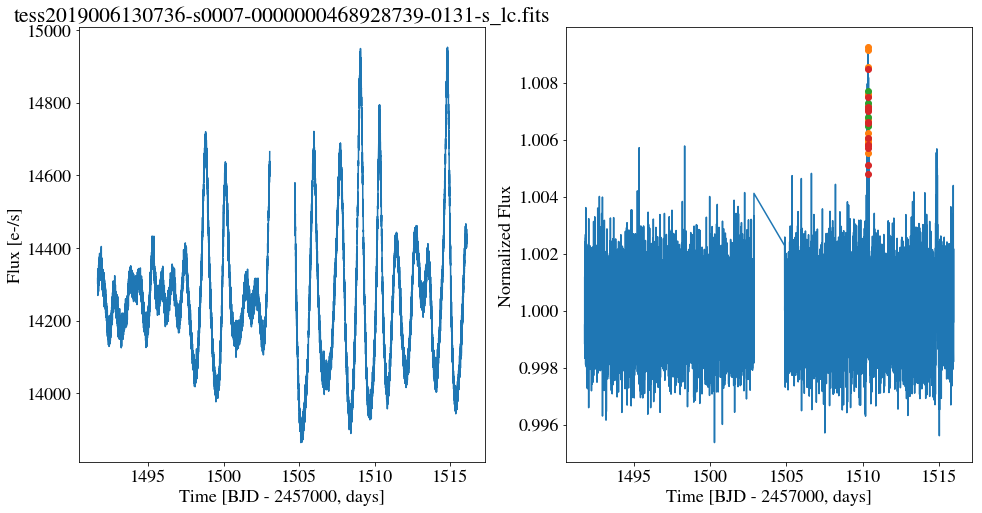

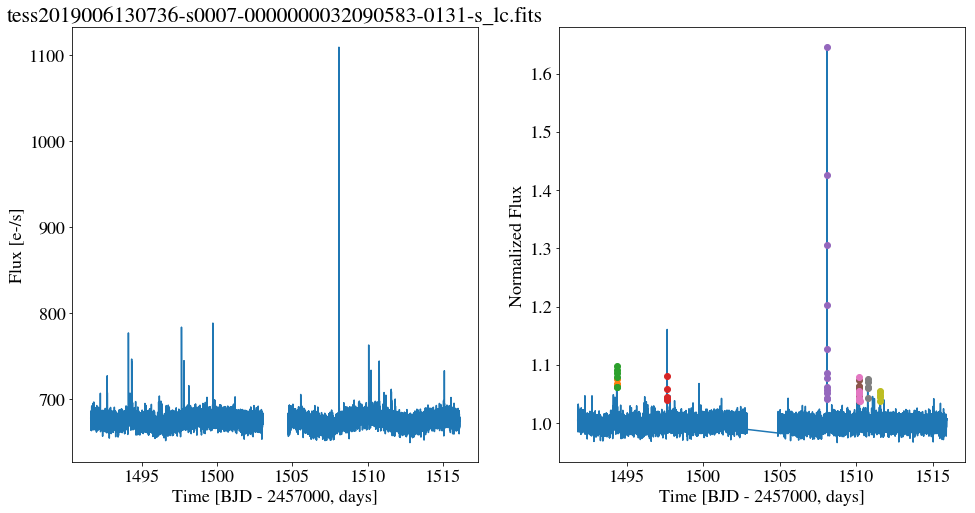

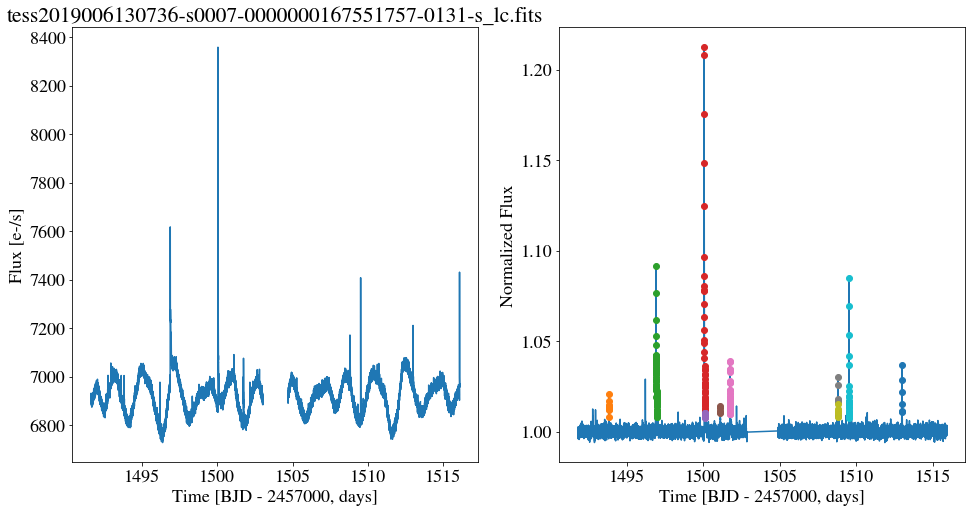

In [75]:
ind_to_plot = [0, 20, 37, 125, 132]

# For LC 1, the jitter term in the GP kernel is dominating

for i in ind_to_plot:
    TIC = df_sub.iloc[i]['TIC']
    TIC_str = str(int(TIC)).zfill(16)
    file = 'tess2019006130736-s0007-'+TIC_str+'-0131-s_lc.fits'
    print(file)

    tstart = df_sub[df_sub['TIC'] == TIC]['t0'].values
    tstop = df_sub[df_sub['TIC'] == TIC]['t1'].values
    median = df_sub[df_sub['TIC'] == TIC]['med'].values[0]

    fig, axes = plt.subplots(figsize=(16,8), nrows=1, ncols=2)

    with fits.open(path+file, mode='readonly') as hdulist:
        tess_bjds = hdulist[1].data['TIME']
        pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
        pdcsap_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']
        quality = hdulist[1].data['QUALITY']

    axes[0].plot(tess_bjds, pdcsap_fluxes)
    axes[0].set_xlabel('Time [BJD - 2457000, days]')
    axes[0].set_ylabel('Flux [e-/s]')
    axes[0].set_title(file)

    smo, var = np.loadtxt(path+file+'.gp')
    time_c, flux_c, flux_err_c = np.loadtxt(path+file+'.clean')

    x = time_c
    y = flux_c/median - smo + 1
    axes[1].plot(x, y)
    for idx in range(len((tstart))):
        indices = np.where((x >= tstart[idx]) & (x <= tstop[idx]))[0]
        axes[1].plot(x[indices], y[indices], 'o')
    axes[1].set_xlabel('Time [BJD - 2457000, days]')
    axes[1].set_ylabel('Normalized Flux')